In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)




In [8]:
type(data)

dict

In [9]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11656,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974798e+07,1.974798e+07,False,NaN,1,NaN,NaN,None,2024-09-01T11:00:00.000Z,57916.462442,1.595850e+10,-41.0674,-0.505158,-2.050108,-9.361567,-10.485302,-3.933759,-15.940908,1.143733e+12,56.1149,1.216246e+12,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
1,1027,Ethereum,ETH,ethereum,9254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203058e+08,1.203058e+08,True,NaN,2,NaN,NaN,None,2024-09-01T10:59:00.000Z,2464.230558,8.031308e+09,-40.9352,-0.808107,-2.414040,-10.531104,-21.929273,-25.497767,-35.300667,2.964611e+11,14.5459,2.964611e+11,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
2,825,Tether USDt,USDT,tether,96097,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.182288e+11,1.202519e+11,True,NaN,3,NaN,NaN,None,2024-09-01T10:59:00.000Z,1.000056,2.854534e+10,-38.1952,0.017573,0.017116,-0.032004,0.091000,0.142882,0.035613,1.182354e+11,5.8010,1.202586e+11,None,2024-09-01T10:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-01 16:32:47.196467
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459349e+08,1.459349e+08,False,NaN,4,NaN,NaN,None,2024-09-01T10:59:00.000Z,517.555499,1.366371e+09,-10.7336,-0.428241,-3.683643,-9.574497,-9.681460,-7.581735,-18.062377,7.552943e+10,3.7061,7.552943e+10,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.665855e+08,5.835116e+08,True,NaN,5,NaN,NaN,None,2024-09-01T10:59:00.000Z,130.575900,1.187860e+09,-48.5763,-0.534813,-4.820291,-16.680930,-20.619557,-9.409334,-20.779412,6.092482e+10,2.9893,7.619256e+10,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
5,3408,USDC,USDC,usd-coin,21817,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.472695e+10,3.472695e+10,False,NaN,6,NaN,NaN,None,2024-09-01T10:59:00.000Z,1.000127,2.447469e+09,-49.4050,0.020117,0.013973,0.025384,0.013406,0.010602,-0.004499,3.473137e+10,1.7042,3.473137e+10,None,2024-09-01T10:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-01 16:32:47.196467
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-01T11:00:00.000Z,0.556920,4.902796e+08,-44.3791,-0.473536,-2.421621,-7.248181,-3.481877,15.261877,7.190326,3.132762e+10,1.5370,5.569200e+10,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
7,74,Dogecoin,DOGE,dogecoin,1050,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457742e+11,1.457742e+11,True,NaN,8,NaN,NaN,None,2024-09-01T11:00:00.000Z,0.098970,2.788594e+08,-48.8904,-0.539689,-2.396547,-9.030602,-15.784608,-17.744481,-38.852349,1.442726e+10,0.7079,1.442726e+10,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
8,1958,TRON,TRX,tron,1021,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...

In [19]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)



    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)


In [20]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed")
    sleep(30)
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11656,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974798e+07,1.974798e+07,False,NaN,1,NaN,NaN,None,2024-09-01T11:00:00.000Z,57916.462442,1.595850e+10,-41.0674,-0.505158,-2.050108,-9.361567,-10.485302,-3.933759,-15.940908,1.143733e+12,56.1149,1.216246e+12,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
1,1027,Ethereum,ETH,ethereum,9254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203058e+08,1.203058e+08,True,NaN,2,NaN,NaN,None,2024-09-01T10:59:00.000Z,2464.230558,8.031308e+09,-40.9352,-0.808107,-2.414040,-10.531104,-21.929273,-25.497767,-35.300667,2.964611e+11,14.5459,2.964611e+11,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
2,825,Tether USDt,USDT,tether,96097,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.182288e+11,1.202519e+11,True,NaN,3,NaN,NaN,None,2024-09-01T10:59:00.000Z,1.000056,2.854534e+10,-38.1952,0.017573,0.017116,-0.032004,0.091000,0.142882,0.035613,1.182354e+11,5.8010,1.202586e+11,None,2024-09-01T10:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-01 16:32:47.196467
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459349e+08,1.459349e+08,False,NaN,4,NaN,NaN,None,2024-09-01T10:59:00.000Z,517.555499,1.366371e+09,-10.7336,-0.428241,-3.683643,-9.574497,-9.681460,-7.581735,-18.062377,7.552943e+10,3.7061,7.552943e+10,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.665855e+08,5.835116e+08,True,NaN,5,NaN,NaN,None,2024-09-01T10:59:00.000Z,130.575900,1.187860e+09,-48.5763,-0.534813,-4.820291,-16.680930,-20.619557,-9.409334,-20.779412,6.092482e+10,2.9893,7.619256e+10,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
5,3408,USDC,USDC,usd-coin,21817,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.472695e+10,3.472695e+10,False,NaN,6,NaN,NaN,None,2024-09-01T10:59:00.000Z,1.000127,2.447469e+09,-49.4050,0.020117,0.013973,0.025384,0.013406,0.010602,-0.004499,3.473137e+10,1.7042,3.473137e+10,None,2024-09-01T10:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-01 16:32:47.196467
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.625156e+10,9.998729e+10,False,NaN,7,NaN,NaN,None,2024-09-01T11:00:00.000Z,0.556920,4.902796e+08,-44.3791,-0.473536,-2.421621,-7.248181,-3.481877,15.261877,7.190326,3.132762e+10,1.5370,5.569200e+10,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
7,74,Dogecoin,DOGE,dogecoin,1050,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457742e+11,1.457742e+11,True,NaN,8,NaN,NaN,None,2024-09-01T11:00:00.000Z,0.098970,2.788594e+08,-48.8904,-0.539689,-2.396547,-9.030602,-15.784608,-17.744481,-38.852349,1.442726e+10,0.7079,1.442726e+10,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
8,1958,TRON,TRX,tron,1021,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...

In [22]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11656,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19747978.00000,19747978.00000,False,NaN,1,NaN,NaN,None,2024-09-01T11:00:00.000Z,57916.46244,15958495859.66112,-41.06740,-0.50516,-2.05011,-9.36157,-10.48530,-3.93376,-15.94091,1143733026133.41650,56.11490,1216245711272.39990,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
1,1027,Ethereum,ETH,ethereum,9254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120305767.32756,120305767.32756,True,NaN,2,NaN,NaN,None,2024-09-01T10:59:00.000Z,2464.23056,8031307925.45881,-40.93520,-0.80811,-2.41404,-10.53110,-21.92927,-25.49777,-35.30067,296461148098.21210,14.54590,296461148098.21002,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
2,825,Tether USDt,USDT,tether,96097,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118228802316.48380,120251893183.66805,True,NaN,3,NaN,NaN,None,2024-09-01T10:59:00.000Z,1.00006,28545336027.12564,-38.19520,0.01757,0.01712,-0.03200,0.09100,0.14288,0.03561,118235389436.41240,5.80100,120258593020.14000,None,2024-09-01T10:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-01 16:32:47.196467
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145934931.78648,145934931.78648,False,NaN,4,NaN,NaN,None,2024-09-01T10:59:00.000Z,517.55550,1366370788.03240,-10.73360,-0.42824,-3.68364,-9.57450,-9.68146,-7.58173,-18.06238,75529426383.85719,3.70610,75529426383.86000,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
4,5426,Solana,SOL,solana,724,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466585514.20450,583511634.90442,True,NaN,5,NaN,NaN,None,2024-09-01T10:59:00.000Z,130.57590,1187859547.87281,-48.57630,-0.53481,-4.82029,-16.68093,-20.61956,-9.40933,-20.77941,60924823531.11530,2.98930,76192556996.78999,None,2024-09-01T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
5,3408,USDC,USDC,usd-coin,21817,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34726948882.31547,34726948882.31547,False,NaN,6,NaN,NaN,None,2024-09-01T10:59:00.000Z,1.00013,2447469399.12087,-49.40500,0.02012,0.01397,0.02538,0.01341,0.01060,-0.00450,34731365691.26073,1.70420,34731365691.26000,None,2024-09-01T10:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-01 16:32:47.196467
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56251561168.00000,99987294444.00000,False,NaN,7,NaN,NaN,None,2024-09-01T11:00:00.000Z,0.55692,490279647.70051,-44.37910,-0.47354,-2.42162,-7.24818,-3.48188,15.26188,7.19033,31327619175.92991,1.53700,55691999520.45000,None,2024-09-01T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-01 16:32:47.196467
7,74,Dogecoin,DOGE,dogecoin,1050,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145774196383.70520,145774196383.70520,True,NaN,8,NaN,NaN,None,2024-09-01T11:00:00.000Z,0.09897,278859381.61604,-48.89040,-0.53969,-2.39655,-9.03060,-15.78461,-17.74448,-38.85235,14427261346.95858,0.70790,14427261346.96000,None,2024-09-01T

In [23]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.11010,-1.91621,-9.35224,-10.35527,-3.69515,-15.98474
Ethereum,-0.48017,-2.26440,-10.51727,-21.81117,-25.28680,-35.23842
Tether USDt,-0.01293,-0.00481,-0.04937,0.07052,0.11728,0.01136
BNB,-0.10967,-3.58662,-9.79581,-9.57381,-7.45511,-17.96219
Solana,-0.00705,-4.57017,-16.82580,-20.36145,-8.88947,-20.73636
USDC,-0.00531,0.00052,0.00639,0.00039,0.00219,-0.00583
XRP,-0.20643,-2.26137,-7.34182,-3.35211,15.45197,7.26236
Dogecoin,-0.13672,-2.36046,-9.23079,-15.60096,-17.34237,-39.02787
TRON,0.07482,-0.58823,-2.68555,23.04660,21.29387,37.68436


In [25]:
df3.count()

quote.USD.percent_change_1h     15
quote.USD.percent_change_24h    15
quote.USD.percent_change_7d     15
quote.USD.percent_change_30d    15
quote.USD.percent_change_60d    15
quote.USD.percent_change_90d    15
dtype: int64

In [27]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.11010
              quote.USD.percent_change_24h    -1.91621
              quote.USD.percent_change_7d     -9.35224
              quote.USD.percent_change_30d   -10.35527
              quote.USD.percent_change_60d    -3.69515
              quote.USD.percent_change_90d   -15.98474
Ethereum      quote.USD.percent_change_1h     -0.48017
              quote.USD.percent_change_24h    -2.26440
              quote.USD.percent_change_7d    -10.51727
              quote.USD.percent_change_30d   -21.81117
              quote.USD.percent_change_60d   -25.28680
              quote.USD.percent_change_90d   -35.23842
Tether USDt   quote.USD.percent_change_1h     -0.01293
              quote.USD.percent_change_24h    -0.00481
              quote.USD.percent_change_7d     -0.04937
              quote.USD.percent_change_30d     0.07052
              quote.USD.percent_change_60d     0.11728
              quote.US

In [28]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.11010
             quote.USD.percent_change_24h  -1.91621
             quote.USD.percent_change_7d   -9.35224
             quote.USD.percent_change_30d -10.35527
             quote.USD.percent_change_60d  -3.69515
             quote.USD.percent_change_90d -15.98474
Ethereum     quote.USD.percent_change_1h   -0.48017
             quote.USD.percent_change_24h  -2.26440
             quote.USD.percent_change_7d  -10.51727
             quote.USD.percent_change_30d -21.81117
             quote.USD.percent_change_60d -25.28680
             quote.USD.percent_change_90d -35.23842
Tether USDt  quote.USD.percent_change_1h   -0.01293
             quote.USD.percent_change_24h  -0.00481
             quote.USD.percent_change_7d   -0.04937
             quote.USD.percent_change_30d   0.07052
             quote.USD.percent_change_60d   0.11728
             quote.USD.percent_change_90d   0.01136
BNB          quote.USD.percent_change_1h   -0.10967
             quote.USD.percent_change_24h  -3.58662
             quote.USD.percent_change_7d   -9.79581
             quote.USD.percent_change_30d  -9.57381
             quote.USD.percent_change_60d  -7.45511
             quote.USD.percent_change_90d -17.96219
Solana       quote.USD.percent_change_1h   -0.00705
             quote.USD.percent_change_24h  -4.57017
             quote.USD.percent_change_7d  -16.82580
             quote.USD.percent_change_30d -20.36145
             quote.USD.percent_change_60d  -8.88947
             quote.USD.percent_change_90d -20.73636
USDC         quote.USD.percent_change_1h   -0.00531
             quote.USD.percent_change_24h   0.00052
             quote.USD.percent_change_7d    0.00639
             quote.USD.percent_change_30d   0.00039
             quote.USD.percent_change_60d   0.00219
             quote.USD.percent_change_90d  -0.00583
XRP          quote.USD.percent_change_1h   -0.20643
             quote.USD.percent_change_24h  -2.26137
             quote.USD.percent_change_7d   -7.34182
             quote.USD.percent_change_30d  -3.35211
             quote.USD.percent_change_60d  15.45197
             quote.USD.percent_change_90d   7.26236
Dogecoin     quote.USD.percent_change_1h   -0.13672
             quote.USD.percent_change_24h  -2.36046
             quote.USD.percent_change_7d   -9.23079
             quote.USD.percent_change_30d -15.60096
             quote.USD.percent_change_60d -17.34237
             quote.USD.percent_change_90d -39.02787
TRON         quote.USD.percent_change_1h    0.07482
             quote.USD.percent_change_24h  -0.58823
             quote.USD.percent_change_7d   -2.68555
             quote.USD.percent_change_30d  23.04660
             quote.USD.percent_change_60d  21.29387
             quote.USD.percent_change_90d  37.68436
Toncoin      quote.USD.percent_change_1h   -0.11379
             quote.USD.percent_change_24h   0.04693
             quote.USD.percent_change_7d   -4.91319
             quote.USD.percent_change_30d -19.51779
             quote.USD.percent_change_60d -31.64950
             quote.USD.percent_change_90d -19.33584
Cardano      quote.USD.percent_change_1h   -0.50297
             quote.USD.percent_change_24h  -1.80914
             quote.USD.percent_change_7d  -10.46488
             quote.USD.percent_change_30d -11.20051
             quote.USD.percent_change_60d -16.05662
             quote.USD.percent_change_90d -24.61246
Avalanche    quote.USD.percent_change_1h   -0.25373
             quote.USD.percent_change_24h  -3.38573
             quote.USD.percent_change_7d  -15.88621
             quote.USD.percent_change_30d -11.14047
             quote.USD.percent_change_60d -18.16619
             quote.USD.percent_change_90d -38.00677
Shiba Inu    quote.USD.percent_change_1h   -0.31303
             quote.USD.percent_change_24h  -2.53750
             quote.USD.percent_change_7d   -9.51120
             quote.USD.percent_change_30d

In [35]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11010
1,Bitcoin,quote.USD.percent_change_24h,-1.91621
2,Bitcoin,quote.USD.percent_change_7d,-9.35224
3,Bitcoin,quote.USD.percent_change_30d,-10.35527
4,Bitcoin,quote.USD.percent_change_60d,-3.69515
5,Bitcoin,quote.USD.percent_change_90d,-15.98474
6,Ethereum,quote.USD.percent_change_1h,-0.48017
7,Ethereum,quote.USD.percent_change_24h,-2.26440
8,Ethereum,quote.USD.percent_change_7d,-10.51727
9,Ethereum,quote.USD.percent_change_30d,-21.81117


In [36]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11010
1,Bitcoin,quote.USD.percent_change_24h,-1.91621
2,Bitcoin,quote.USD.percent_change_7d,-9.35224
3,Bitcoin,quote.USD.percent_change_30d,-10.35527
4,Bitcoin,quote.USD.percent_change_60d,-3.69515
5,Bitcoin,quote.USD.percent_change_90d,-15.98474
6,Ethereum,quote.USD.percent_change_1h,-0.48017
7,Ethereum,quote.USD.percent_change_24h,-2.26440
8,Ethereum,quote.USD.percent_change_7d,-10.51727
9,Ethereum,quote.USD.percent_change_30d,-21.81117


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.11010
1,Bitcoin,24h,-1.91621
2,Bitcoin,7d,-9.35224
3,Bitcoin,30d,-10.35527
4,Bitcoin,60d,-3.69515
5,Bitcoin,90d,-15.98474
6,Ethereum,1h,-0.48017
7,Ethereum,24h,-2.26440
8,Ethereum,7d,-10.51727
9,Ethereum,30d,-21.81117


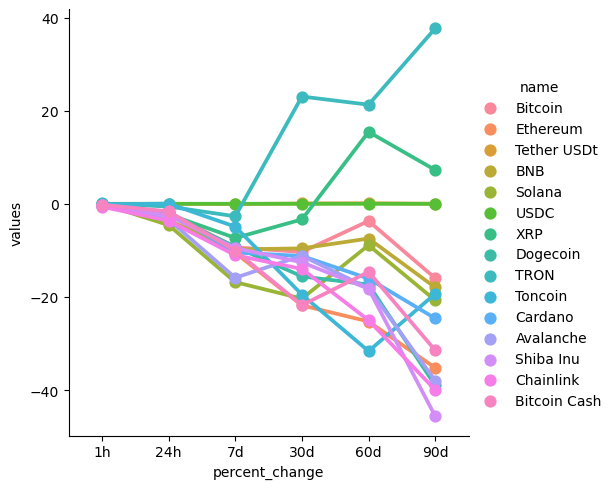

In [40]:
sns.catplot(x='percent_change',y='values', hue='name', data = df7, kind='point')

In [41]:
df8 = df[['name','quote.USD.price','timestamp']]
#df8 = df10.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,57916.46244,2024-09-01 16:32:47.196467
1,Ethereum,2464.23056,2024-09-01 16:32:47.196467
2,Tether USDt,1.00006,2024-09-01 16:32:47.196467
3,BNB,517.55550,2024-09-01 16:32:47.196467
4,Solana,130.57590,2024-09-01 16:32:47.196467
5,USDC,1.00013,2024-09-01 16:32:47.196467
6,XRP,0.55692,2024-09-01 16:32:47.196467
7,Dogecoin,0.09897,2024-09-01 16:32:47.196467
8,TRON,0.15649,2024-09-01 16:32:47.196467
9,Toncoin,5.33289,2024-09-01 16:32:47.196467


In [45]:
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,57916.46244,2024-09-01 16:32:47.196467
15,Bitcoin,58002.80439,2024-09-01 16:44:40.142969
30,Bitcoin,58002.80439,2024-09-01 16:45:12.492269
45,Bitcoin,58002.80439,2024-09-01 16:45:44.664296
60,Bitcoin,58002.80439,2024-09-01 16:46:18.040053
75,Bitcoin,57987.09608,2024-09-01 16:46:50.193288
90,Bitcoin,57987.09608,2024-09-01 16:47:22.959560
105,Bitcoin,57988.90746,2024-09-01 16:47:54.439302


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

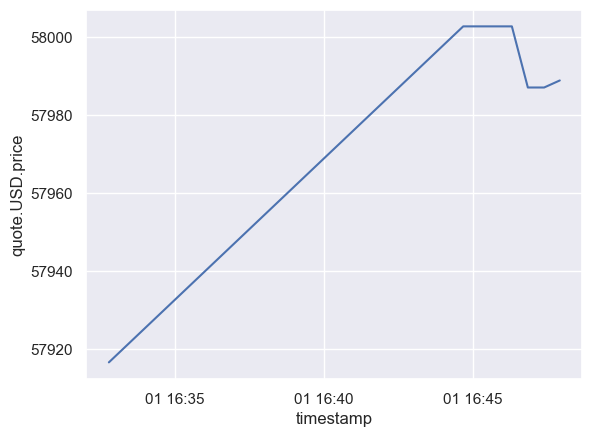

In [46]:
sns.set_theme(style='darkgrid')

sns.lineplot(x=df9['timestamp'],y=df9['quote.USD.price'],data=df9)